<a href="https://colab.research.google.com/github/vivek72v/AlmabetterProjects/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement
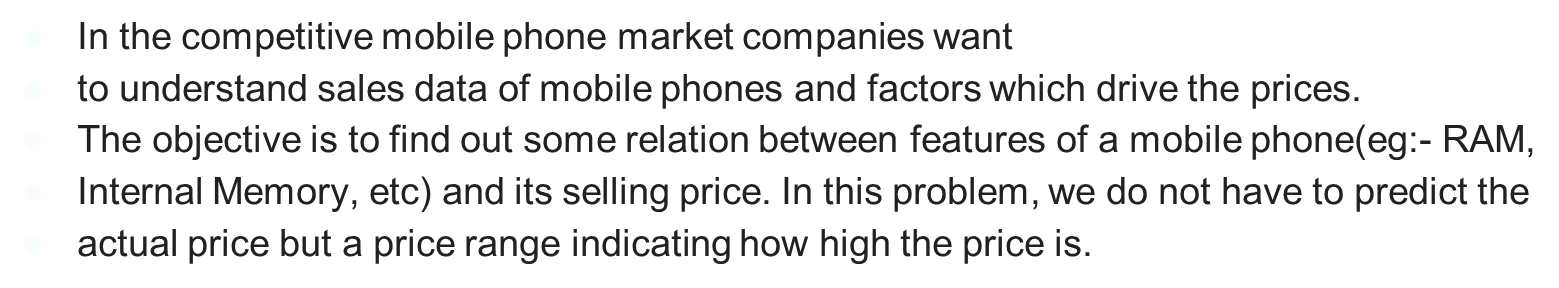

In [ ]:
#let's import the modules
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading DataSet
df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/DataSets/data_mobile_price_range.csv")

In [ ]:
#Look at first five rows of the data by transposing for easy view and understanding the data
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
#Look at the last five rows of data
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
#Viewing each column data type , checking the null values and other information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
#Looking at the descriptive statistics of the datset
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#Treating the records having  value of column 'sc_w' equal to zero

In [ ]:
# checking how many rows have  'sc_w' 0
df[df['sc_w']==0].shape[0]

180

In [ ]:
#Finding the mean of the 'sc_w of the corresponding record according to different 'sc_h' 
srs = df[df['sc_w']!=0].groupby(by='sc_h')['sc_w'].mean()

In [ ]:
#Treating the rows with 'sc_w' value equal to zero
d = dict(zip(srs.index,np.round(srs.values)))
for i in range(2000):
    if df['sc_w'][i] == 0:
        df['sc_w'][i]= d[df['sc_h'][i]]

In [ ]:
#Converting columns 'sc_h' and 'sc_w' in a single column screen_size , it will be the diagonal length of the mobile screen size.
df['screen_size'] = ((df['sc_h']**2)+(df['sc_w']**2))**0.5
df.drop(['sc_h','sc_w'], axis=1 ,inplace=True)

#Treating the records having  value of column 'px_height' equal to zero

In [ ]:
#observations where 'px_height' is 0
df[df['px_height']==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,screen_size
1481,1834,0,2.1,0,7,1,40,0.1,99,4,11,0,1987,3692,16,1,1,0,3,14.764823
1933,897,1,2.0,0,3,1,2,0.6,154,8,10,0,994,1958,7,1,1,0,1,8.602325


In [ ]:
#Droping the records having 'px_h' equal to zero
df.drop(axis = 0 , index = [1481,1933], inplace = True )

In [ ]:
#converting columns 'px_height' and 'px_width' into a single column 'pixels'
df['pixels'] = df.px_height*df.px_width

#Differentiate between the continuous and the categorical variables

In [ ]:
# categorical and continuous separation

categoricals = [ 'blue',  'dual_sim',  'four_g','three_g', 'touch_screen', 'wifi', 'n_cores']

continuous = ['battery_power','clock_speed','fc','int_memory','m_dep', 'mobile_wt', 'pc', 'pixels', 'ram', 'talk_time','screen_size']

#Categorical Analysis#

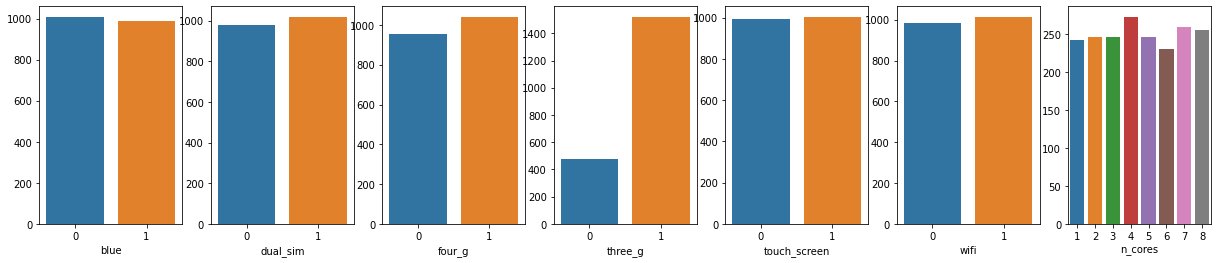

In [ ]:
#Checking wheter the categorical columns are balanced or not. 
fig, axs = plt.subplots(1, len(categoricals), figsize=(21,4))

for i in range(len(categoricals)):
    sns.countplot(x=df[categoricals[i]], ax=axs[i])
    axs[i].set_ylabel('')

In [ ]:
# function to plot the distribution of categorical feature for each price range category
def categorical_distribution(column_name):
    fig, axs = plt.subplots(1,4, figsize=(16, 4))
    for i in range(4):
        sns.countplot(x=df[df['price_range']==i][column_name] , ax=axs[i])
        axs[i].set_xlabel(f'{column_name} category')
        axs[i].set_title(f'for price_range = {i}')
    fig.suptitle(column_name.upper(),fontsize = 14)
    plt.show()

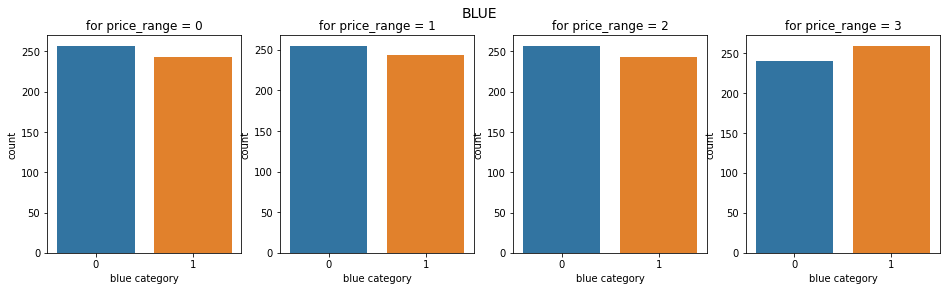



*******************************************************************************************************************************************************




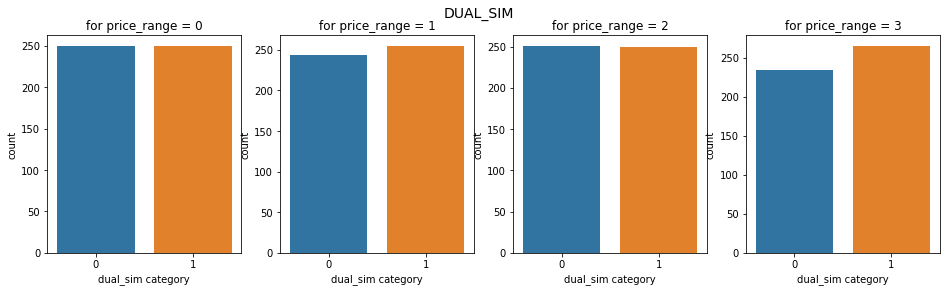



*******************************************************************************************************************************************************




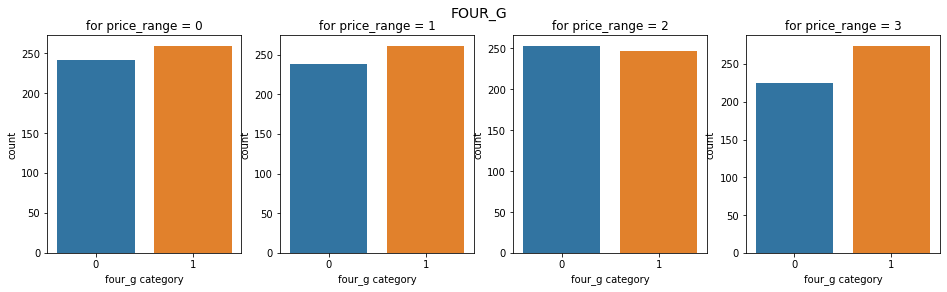



*******************************************************************************************************************************************************




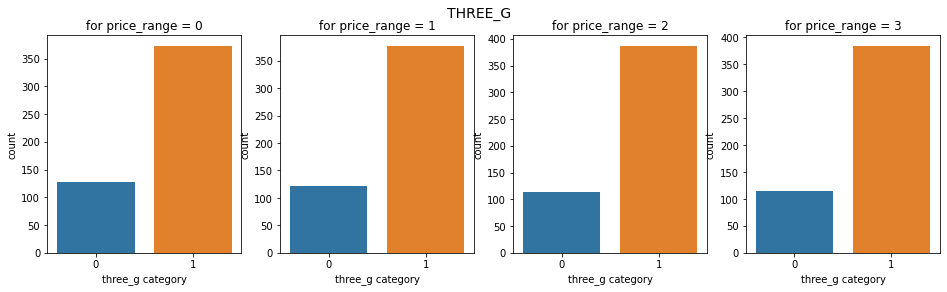



*******************************************************************************************************************************************************




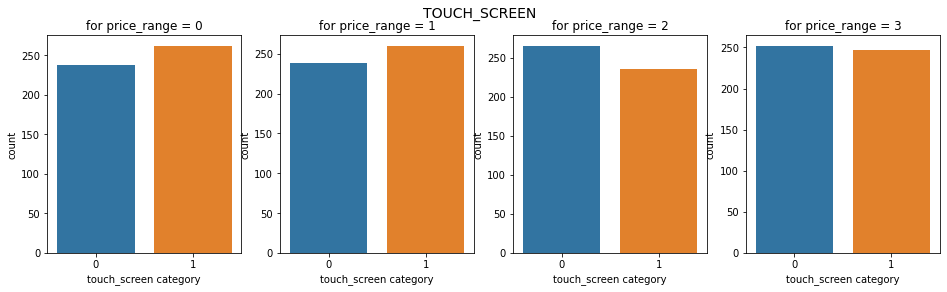



*******************************************************************************************************************************************************




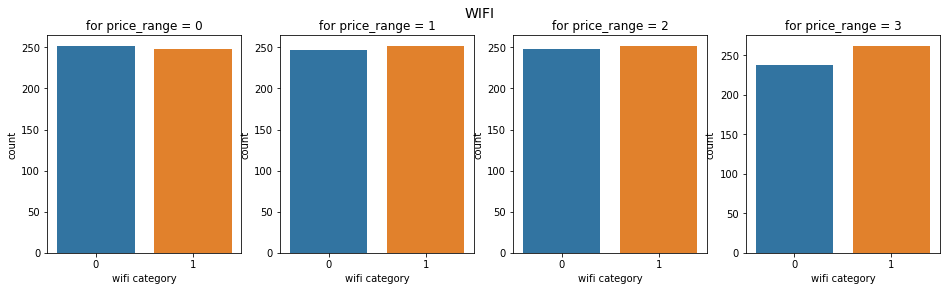



*******************************************************************************************************************************************************




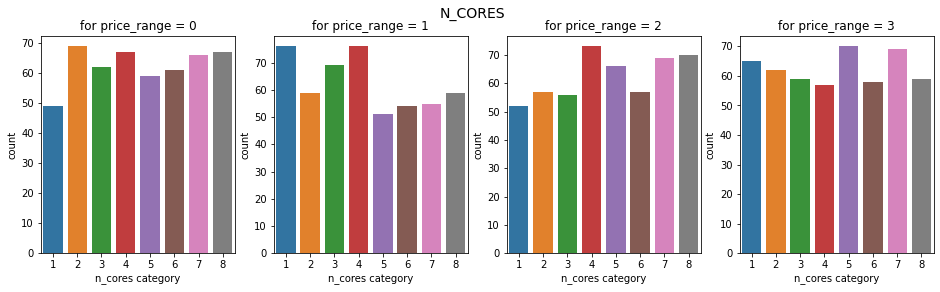



*******************************************************************************************************************************************************




In [ ]:
#Plotting each categorical columns for each of the four price range
for i in categoricals:
  categorical_distribution(i)
  print('\n\n*******************************************************************************************************************************************************\n\n')

#Continuous Variable Analysis#

In [ ]:
#Function to plot KDE plot with price range as hue and Box plot for each price range.
def plot_kde_and_box_plot(column_name):
  fig, axs = plt.subplots(1,2, figsize=(15,5))
  sns.kdeplot(data=df, x=column_name, hue='price_range', ax=axs[0])
  sns.boxplot(data=df, x='price_range', y=column_name, ax=axs[1])
  fig.suptitle("KDE AND BOXPLOT FOR : " + column_name.upper(),fontsize = 14)
  plt.show()

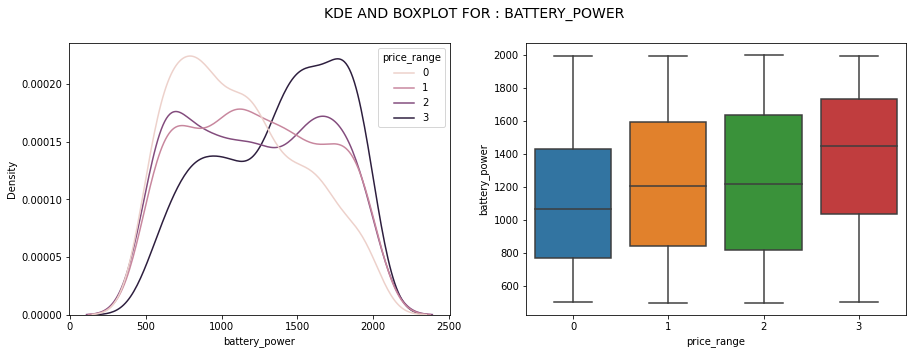



*******************************************************************************************************************************************************




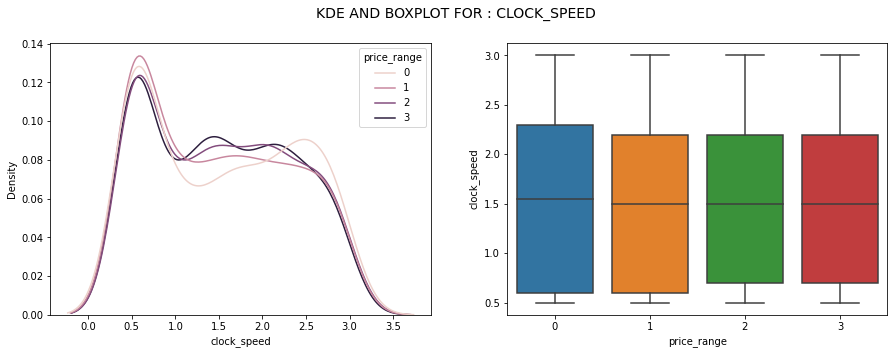



*******************************************************************************************************************************************************




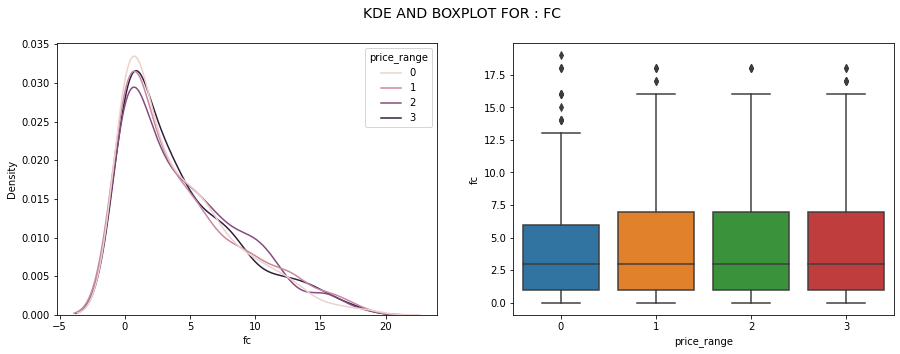



*******************************************************************************************************************************************************




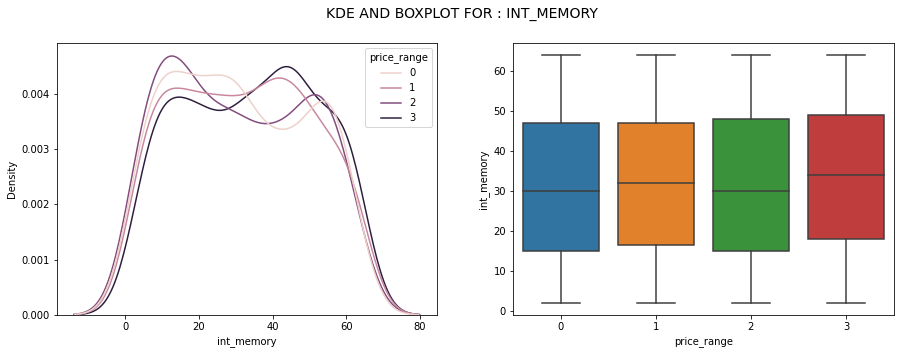



*******************************************************************************************************************************************************




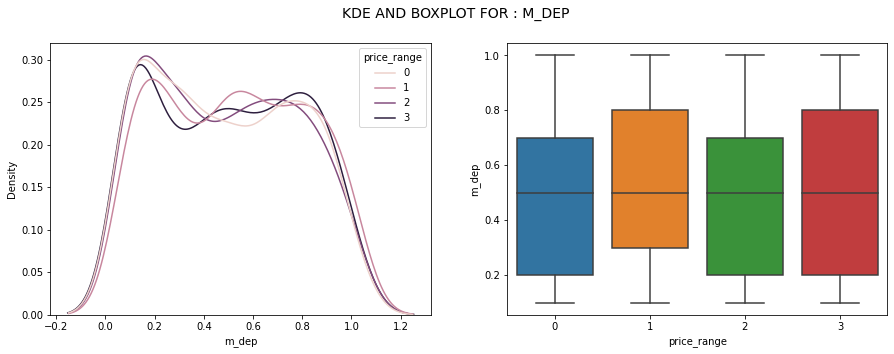



*******************************************************************************************************************************************************




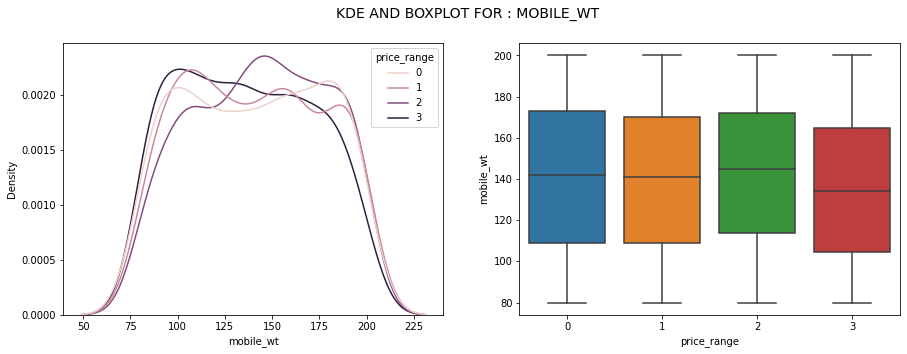



*******************************************************************************************************************************************************




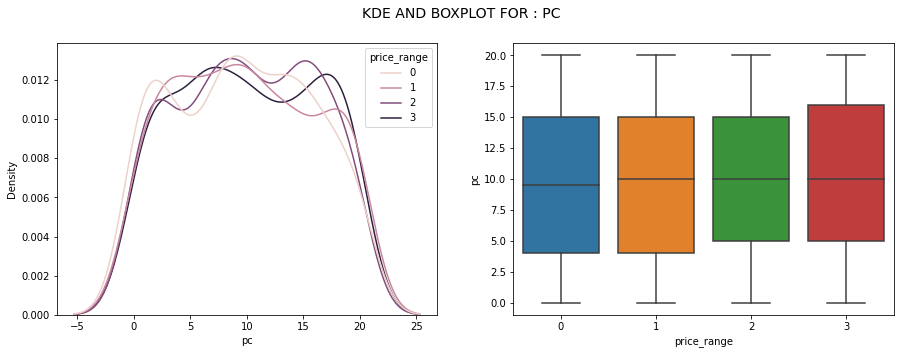



*******************************************************************************************************************************************************




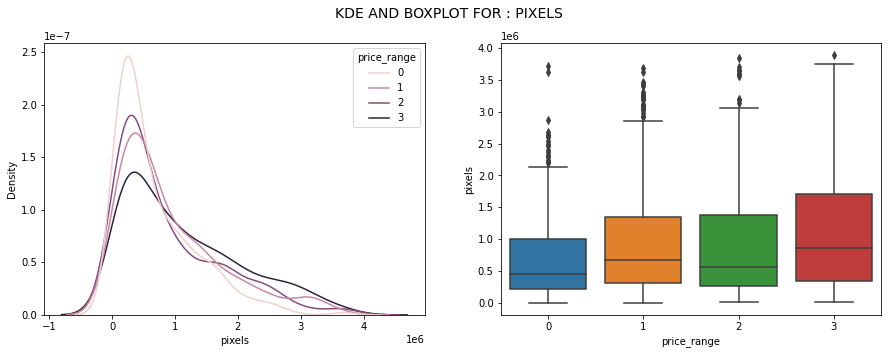



*******************************************************************************************************************************************************




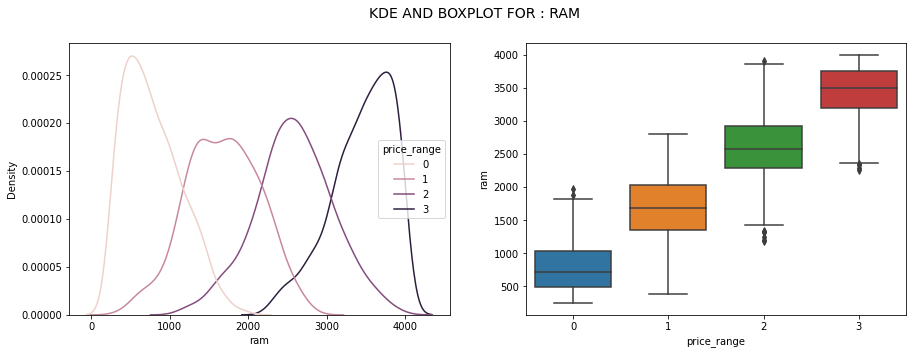



*******************************************************************************************************************************************************




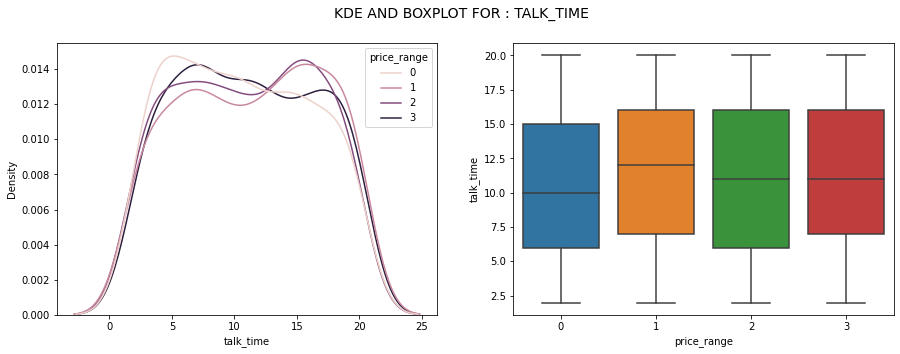



*******************************************************************************************************************************************************




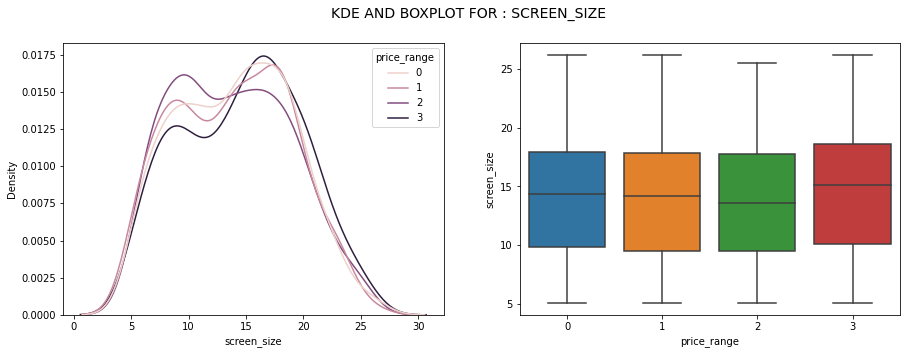



*******************************************************************************************************************************************************




In [ ]:
#Plotting KDE and box plot for each continuous variable
for i in continuous:
  plot_kde_and_box_plot(i)
  print('\n\n*******************************************************************************************************************************************************\n\n')

#Outlier Analysis and Treatment#

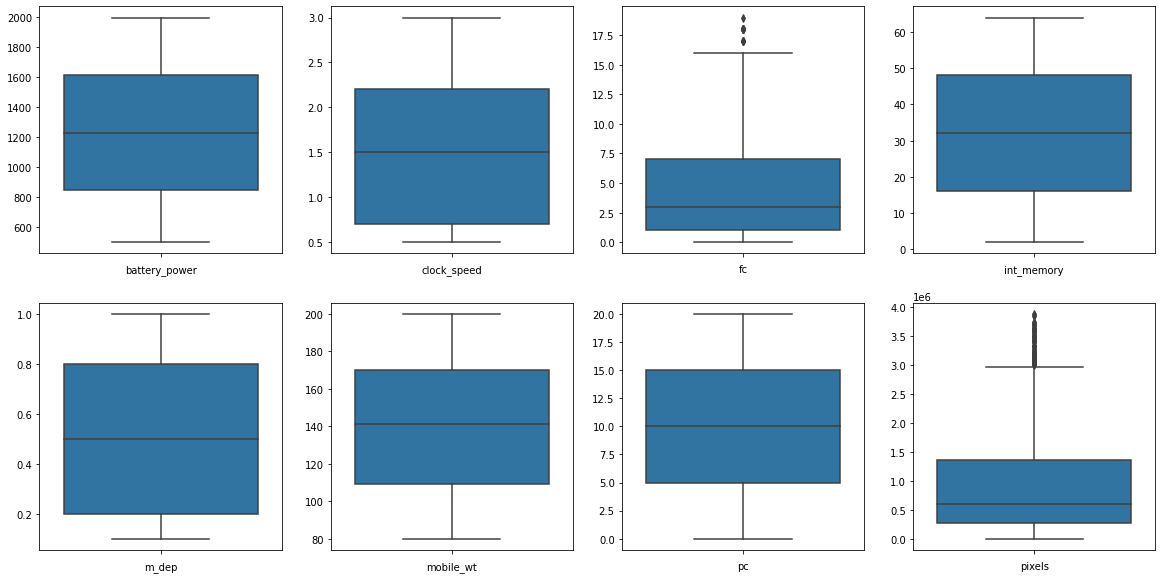

In [ ]:
#Creating boxplot for each continuous variable for outlier analysis.
fig, axs = plt.subplots(2,4, figsize=(20,10))
for i in range(8):
    sns.boxplot(y =df[continuous[i]], ax=axs[i//4][i%4])
    axs[i//4][i%4].set_xlabel(continuous[i])
    axs[i//4][i%4].set_ylabel('')
plt.show()

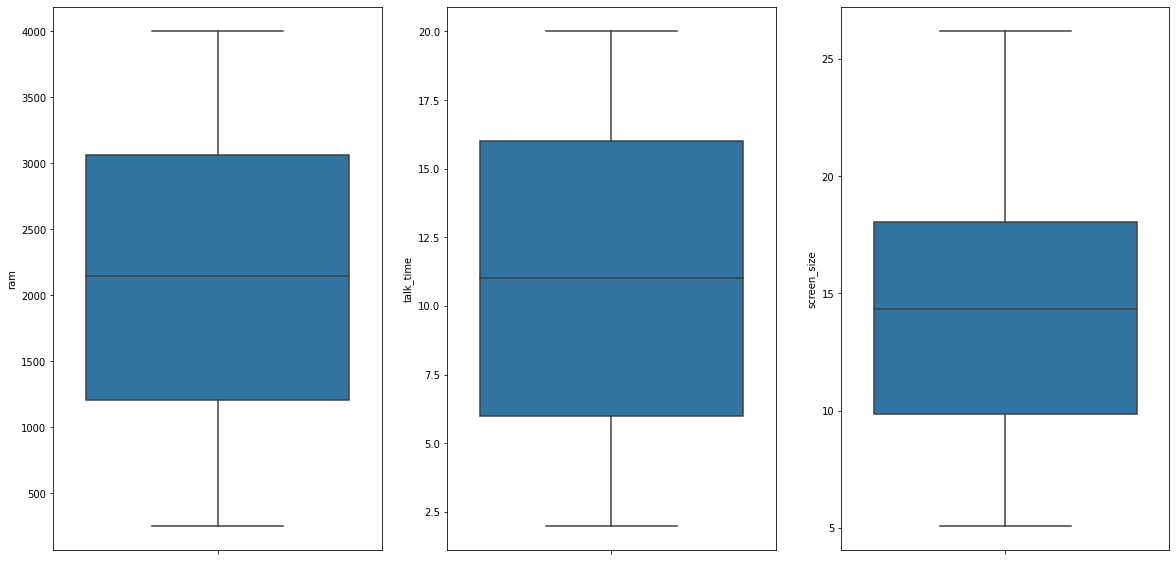

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(20,10))
for k in range(8,len(continuous)):
  sns.boxplot(y = df[continuous[k]],ax = axs[k-8])
plt.show()


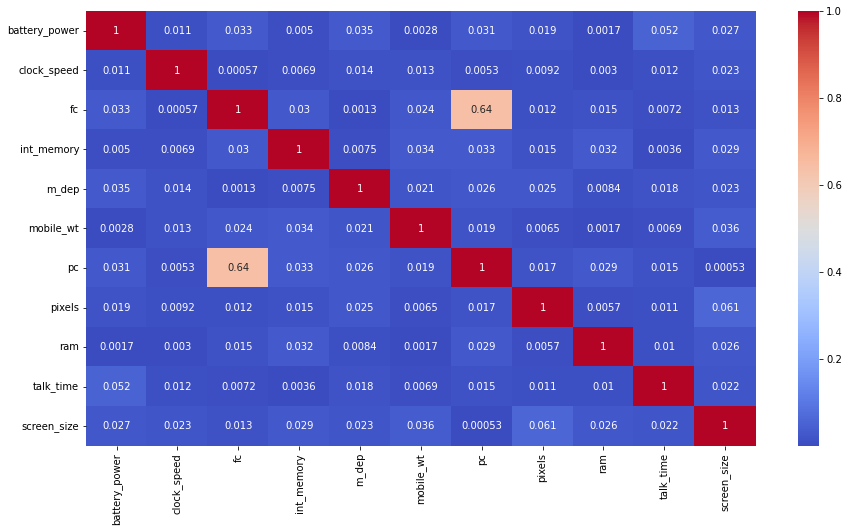

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = df[continuous].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

## CREATING MODELS

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.metrics import roc_auc_score, confusion_matrix

In [ ]:
dependent_variable = 'price_range'
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

In [ ]:
# Create the data of independent variables
x = df[independent_variables].values

# Create the dependent variable data
y = df[dependent_variable].values

In [ ]:
#Splitting the data into train and test set
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0)

In [ ]:
# Transforming data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Function to asses Model Performance and Feature Importance

In [ ]:
def model_asses():
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(clsr, x_test, y_test)
  plt.show()
  

In [ ]:
def feature_importance() :
  feature_importance = pd.DataFrame({'Feature':df[independent_variables].columns,
                                 'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
  fig, ax = plt.subplots(figsize=(15,8))
  ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])

#Ridge Regression

In [ ]:
#Ridge Regression
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
clsr = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
clsr.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RidgeClassifier(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
y_pred = clsr.predict(x_test)

In [ ]:
clsr.best_params_

{'alpha': 1e-15}

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       104
           1       0.72      0.24      0.36        88
           2       0.72      0.21      0.33       108
           3       0.57      1.00      0.72       100

    accuracy                           0.62       400
   macro avg       0.66      0.61      0.55       400
weighted avg       0.66      0.62      0.55       400



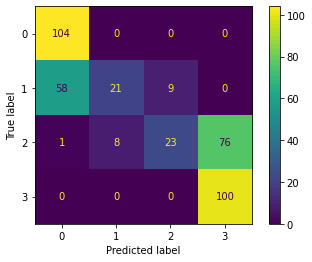

In [ ]:
model_asses()

#Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clsr = DecisionTreeClassifier()

In [ ]:
clsr.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clsr.predict(x_test)

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       104
           1       0.87      0.88      0.87        88
           2       0.80      0.80      0.80       108
           3       0.83      0.85      0.84       100

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



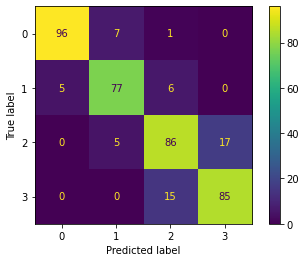

In [ ]:
model_asses()

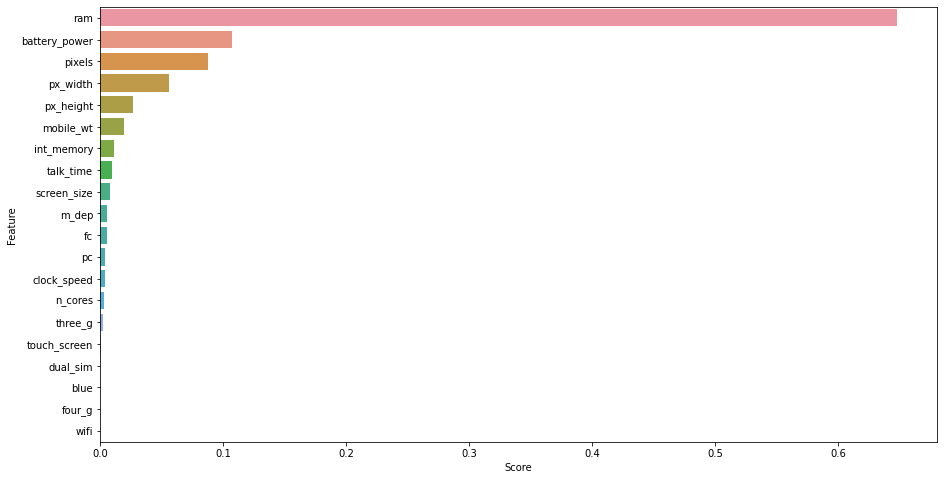

In [ ]:
feature_importance()

#AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
clsr = AdaBoostClassifier(n_estimators=300, base_estimator=dt,learning_rate=1,)

In [ ]:
clsr.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=300)

In [ ]:
y_pred = clsr.predict(x_test)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       104
           1       0.85      0.84      0.85        88
           2       0.83      0.78      0.80       108
           3       0.84      0.92      0.88       100

    accuracy                           0.86       400
   macro avg       0.86      0.87      0.86       400
weighted avg       0.87      0.86      0.86       400



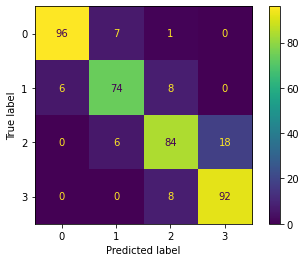

In [ ]:
model_asses()

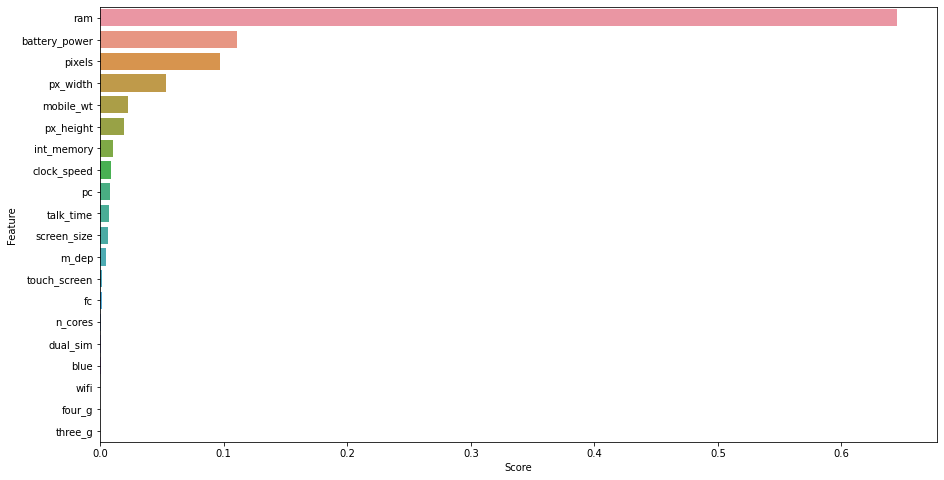

In [ ]:
feature_importance()

#Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clsr = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0, max_depth=1)

In [ ]:
clsr.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=300)

In [ ]:
y_pred = clsr.predict(x_test)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       104
           1       0.91      0.92      0.92        88
           2       0.92      0.92      0.92       108
           3       0.95      0.95      0.95       100

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



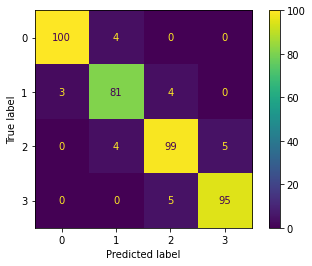

In [ ]:
model_asses()

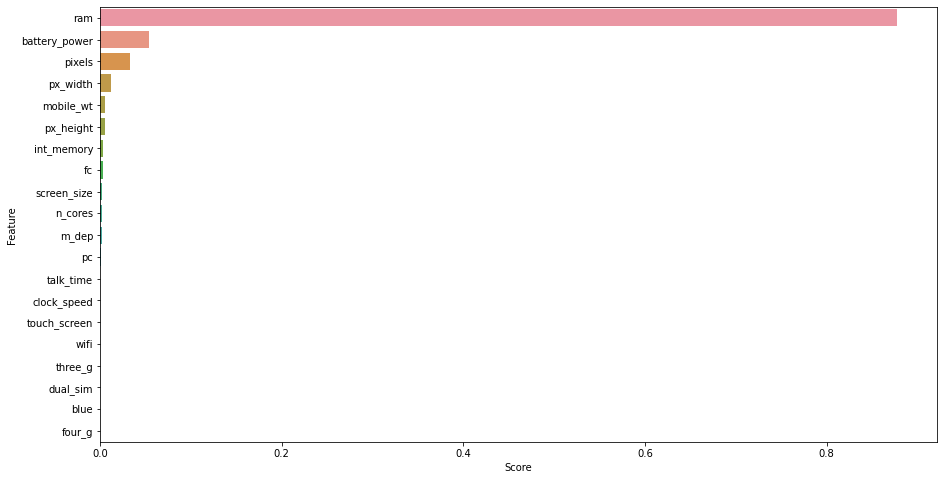

In [ ]:
feature_importance()

#XGBoost

In [ ]:
from xgboost.sklearn import XGBClassifier

In [ ]:
clsr = XGBClassifier(n_estimators=300)

In [ ]:
clsr.fit(x_train, y_train)

XGBClassifier(n_estimators=300, objective='multi:softprob')

In [ ]:
y_pred = clsr.predict(x_test)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       104
           1       0.90      0.92      0.91        88
           2       0.90      0.88      0.89       108
           3       0.94      0.94      0.94       100

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



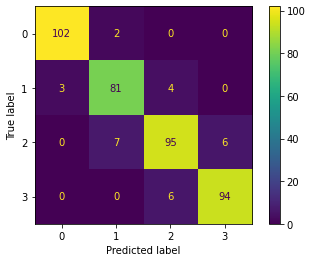

In [ ]:
model_asses()

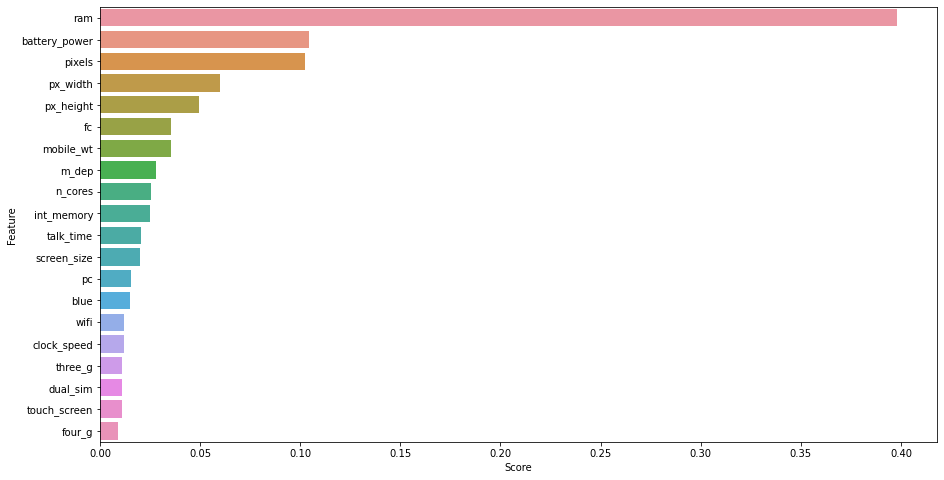

In [ ]:
feature_importance()